## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\GothamTikyani\Downloads\heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [4]:
for i in range(len(df.columns)):
    missing_data = df.iloc[:,i].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<AxesSubplot:>

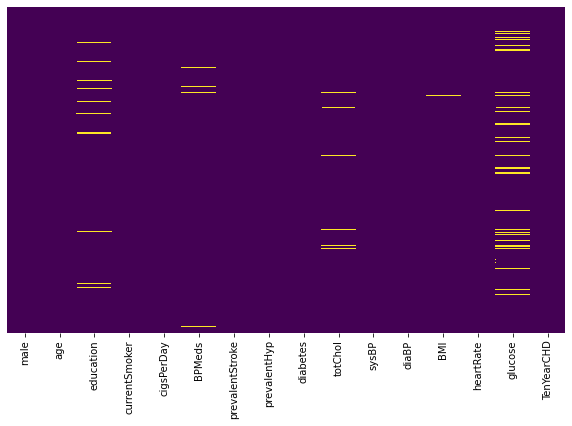

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [6]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [7]:
imp = SimpleImputer (missing_values=np.nan, strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [8]:
data = df.values

In [9]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [ ]:
imp.fit(df)     

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [11]:
df_transform = pd.DataFrame(imp.transform(df), columns =df.columns)

### Sanity Check: Whether missing values are filled or not

In [12]:
missing_check = df.isna().sum()
print("Missing Values:", missing_check.sum())

Missing cells: 645


In [13]:
missing_check_2 = df_transform.isna().sum()
print("Missing Values:", missing_check_2.sum())

Missing cells: 0


### Let's try to visualize the missing values.

<AxesSubplot:>

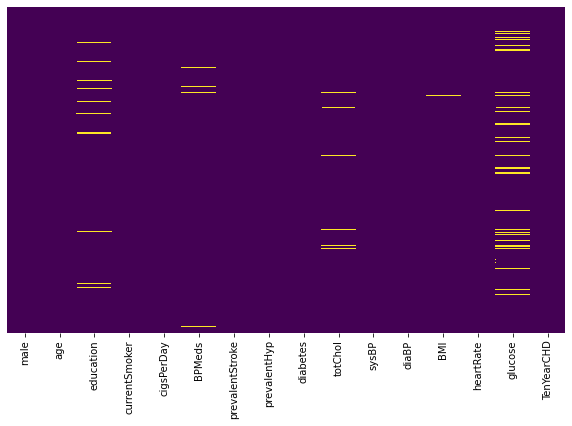

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(X_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

<Figure size 720x432 with 0 Axes>

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [16]:
## The X_transform needs to be df_transform 

df_transform.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753


<AxesSubplot:>

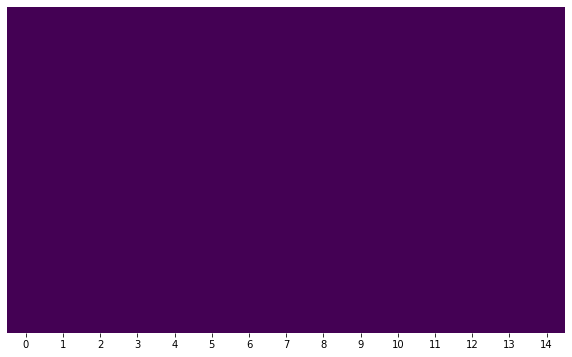

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [8]:
X_train = pd.read_csv(r"C:\Users\GothamTikyani\Downloads\X_train.csv")
Y_train = pd.read_csv(r"C:\Users\GothamTikyani\Downloads\Y_train.csv")
Y_test = pd.read_csv(r"C:\Users\GothamTikyani\Downloads\Y_test.csv")
X_test = pd.read_csv(r"C:\Users\GothamTikyani\Downloads\X_test.csv")

In [9]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

In [14]:
 X_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

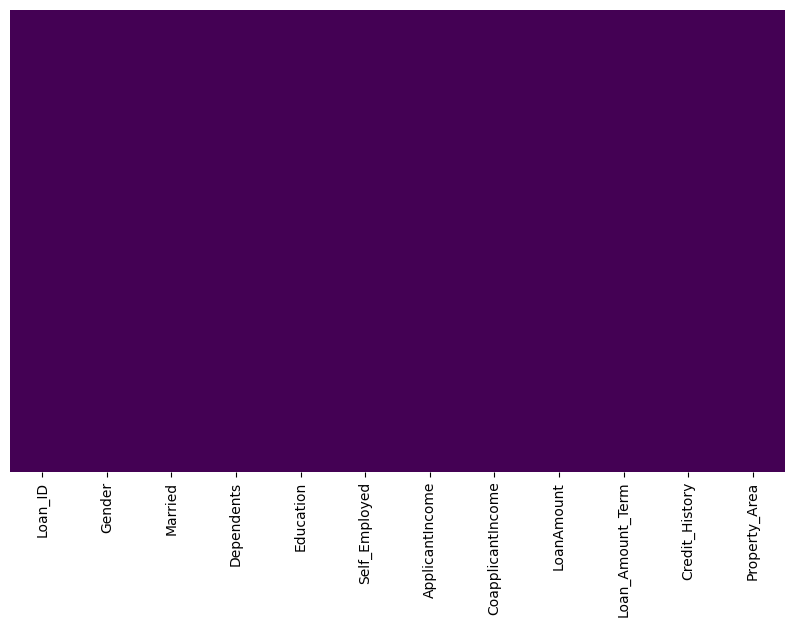

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [15]:
## No, there's no missing data in the dataset

# Build a Logistic Regression model Without imputation

In [21]:
df=pd.read_csv(r"C:\Users\GothamTikyani\Downloads\heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv(r"C:\Users\GothamTikyani\Downloads\heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
df.shape

(4238, 16)

### Drop rows with missing values

In [8]:
df_cleaned = df.dropna()
df_cleaned.shape

(3656, 16)

### Split dataset into X and y

In [13]:
X = df_cleaned.drop('TenYearCHD', axis  =1)
y = df_cleaned['TenYearCHD']

X.shape

(3656, 15)

In [14]:
y.shape

(3656,)

### Create a pipeline with model parameter

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(penalty='l2', C=.01))])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [26]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [ ]:
model = LogisticRegression(penalty='l2', C=.01)
cv_scores = cross_val_score(model, X, y, cv=rskf)

print(f"Cross-Validation Scores: {cv_scores}")


c:\Users\GothamTikyani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\GothamTikyani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross-Validation Scores: [0.85245902 0.85245902 0.8442623  0.8442623  0.84699454 0.83879781
 0.84657534 0.85479452 0.84383562 0.85479452 0.84699454 0.84972678
 0.85519126 0.8442623  0.85245902 0.84699454 0.84109589 0.84657534
 0.85753425 0.84657534 0.85245902 0.85245902 0.85519126 0.8442623
 0.84972678 0.83606557 0.84931507 0.85205479 0.84383562 0.83835616]
Mean Accuracy: 0.85


c:\Users\GothamTikyani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\GothamTikyani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [35]:


scores = cv_scores
scores

array([0.85245902, 0.85245902, 0.8442623 , 0.8442623 , 0.84699454,
       0.83879781, 0.84657534, 0.85479452, 0.84383562, 0.85479452,
       0.84699454, 0.84972678, 0.85519126, 0.8442623 , 0.85245902,
       0.84699454, 0.84109589, 0.84657534, 0.85753425, 0.84657534,
       0.85245902, 0.85245902, 0.85519126, 0.8442623 , 0.84972678,
       0.83606557, 0.84931507, 0.85205479, 0.84383562, 0.83835616])

### Print the Mean Accuracy and Standard Deviation from scores

In [36]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.005


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c:\Users\GothamTikyani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8333333333333334


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [41]:
df=pd.read_csv(r"C:\Users\GothamTikyani\Downloads\heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [38]:
df.shape

(4238, 16)

In [44]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']
X.shape

(4238, 15)

In [45]:
y.shape

(4238,)

### Create a SimpleImputer with mean strategy

In [80]:
from sklearn.impute import SimpleImputer


imp = SimpleImputer(missing_values=np.nan, strategy= 'mean')
imp.fit(df) 
df_transform = pd.DataFrame(imp.transform(df), columns = df.columns)

missing_check = df_transform.isna().sum()
print(missing_check.sum())

X = df_transform.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']


0


<AxesSubplot:>

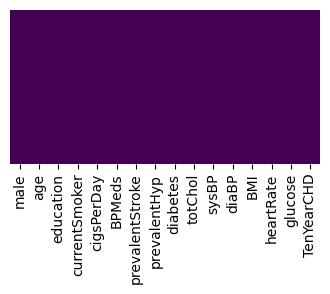

In [83]:
plt.figure(figsize=(4,2))

sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [84]:
X.shape

(4238, 15)

### Create a Logistic Regression model

In [85]:
model = LogisticRegression(penalty='l2', C=0.1)

### Create a pipeline with impute and model parameters

In [86]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(penalty='l2', C=.01))])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [88]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [89]:
cv_scores = cross_val_score(model, X, y, cv=rskf)

c:\Users\GothamTikyani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\GothamTikyani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [90]:
cv_scores

array([0.84669811, 0.85377358, 0.84433962, 0.85377358, 0.84669811,
       0.84433962, 0.8490566 , 0.84669811, 0.85106383, 0.8534279 ,
       0.8490566 , 0.85377358, 0.85141509, 0.85377358, 0.84433962,
       0.84669811, 0.84433962, 0.8490566 , 0.83687943, 0.85106383,
       0.85377358, 0.85141509, 0.84198113, 0.8490566 , 0.85141509,
       0.85849057, 0.8490566 , 0.85613208, 0.85106383, 0.84397163])

### Print the Mean Accuracy and Standard Deviation

In [91]:
print(f"Mean Accuracy: {round(np.mean(cv_scores), 3)}  | Std: {round(np.std(cv_scores), 3)}")

Mean Accuracy: 0.849  | Std: 0.005


<AxesSubplot:>

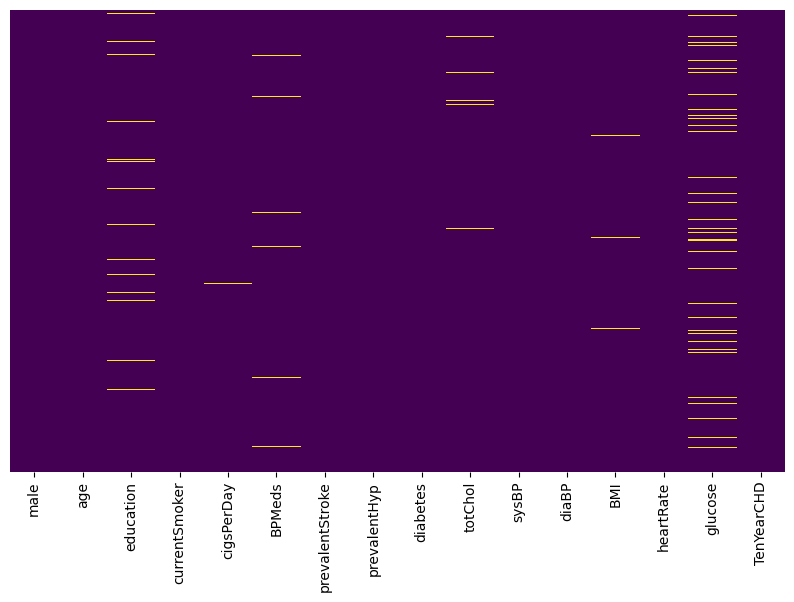

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

In [96]:
print("SimpleImputer with Mean Strategy")

SimpleImputer with Mean Strategy


# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [99]:
imp = SimpleImputer(missing_values=np.nan, strategy= 'mean')
imp.fit(df) 
df_transform = pd.DataFrame(imp.transform(df), columns = df.columns)

missing_check = df_transform.isna().sum()
print(missing_check.sum())

X = df_transform.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']


0


### Create a RandomForest model

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)

### Create a pipeline

In [103]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Step 2: Scale the data
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

### Create RepeatedStratifiedKFold

In [104]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Create Cross_val_score

In [107]:
cv_scores = cross_val_score(model, X, y, cv=rskf)
cv_scores

array([0.85849057, 0.84433962, 0.85141509, 0.83018868, 0.85849057,
       0.85141509, 0.85141509, 0.84433962, 0.86288416, 0.85106383,
       0.84433962, 0.84198113, 0.8490566 , 0.86320755, 0.8490566 ,
       0.85377358, 0.84433962, 0.84198113, 0.85106383, 0.85815603,
       0.84669811, 0.84198113, 0.84669811, 0.85141509, 0.84198113,
       0.84669811, 0.84198113, 0.84433962, 0.85106383, 0.85579196])

### Print Mean Accuracy and Standard Deviation

In [106]:
print(f"Mean Accuracy: {round(np.mean(cv_scores), 3)}  | Std: {round(np.std(cv_scores), 3)}")

Mean Accuracy: 0.849  | Std: 0.007


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np



X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Strategies and algorithms
strategies = ['mean', 'median', 'most_frequent', 'constant']
algorithms = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}


rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


results = []
for strategy in strategies:
    for algo_name, algo in algorithms.items():
        
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy=strategy, fill_value=0)),  
            ('scaler', StandardScaler()),                               
            ('model', algo)                                            
        ])
        
       
        cv_scores = cross_val_score(pipeline, X, y, cv=rskf, scoring='accuracy')
        
       
        results.append({
            'Strategy': strategy,
            'Algorithm': algo_name,
            'Mean Accuracy': np.mean(cv_scores),
            'Std Accuracy': np.std(cv_scores)
        })


results_df = pd.DataFrame(results)


print(results_df)

c:\Users\GothamTikyani\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\GothamTikyani\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

         Strategy            Algorithm  Mean Accuracy  Std Accuracy
0            mean  Logistic Regression       0.854572      0.005802
1            mean                  KNN       0.833965      0.008853
2            mean        Random Forest       0.847886      0.006000
3            mean                  SVM       0.847727      0.001857
4            mean    Gradient Boosting       0.845843      0.008226
5          median  Logistic Regression       0.854572      0.005802
6          median                  KNN       0.834516      0.009150
7          median        Random Forest       0.849303      0.006908
8          median                  SVM       0.847727      0.001857
9          median    Gradient Boosting       0.846552      0.008500
10  most_frequent  Logistic Regression       0.854729      0.005773
11  most_frequent                  KNN       0.834516      0.008336
12  most_frequent        Random Forest       0.847101      0.005644
13  most_frequent                  SVM       0.8

In [118]:
results_df = pd.DataFrame(results)

results_df['Mean Accuracy'] = results_df['Mean Accuracy'].round(3)
results_df['Std Accuracy'] = results_df['Std Accuracy'].round(3)

results_df = results_df.sort_values(by='Mean Accuracy', ascending=False)

print(results_df)

         Strategy            Algorithm  Mean Accuracy  Std Accuracy
0            mean  Logistic Regression          0.855         0.006
5          median  Logistic Regression          0.855         0.006
10  most_frequent  Logistic Regression          0.855         0.006
15       constant  Logistic Regression          0.854         0.006
7          median        Random Forest          0.849         0.007
3            mean                  SVM          0.848         0.002
13  most_frequent                  SVM          0.848         0.002
2            mean        Random Forest          0.848         0.006
18       constant                  SVM          0.848         0.002
8          median                  SVM          0.848         0.002
17       constant        Random Forest          0.848         0.006
14  most_frequent    Gradient Boosting          0.847         0.008
19       constant    Gradient Boosting          0.847         0.007
12  most_frequent        Random Forest          

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [ ]:
## MEAN

# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [ ]:
## LogisticRegression

# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [119]:
## Mean & Logistic Regression